In [199]:
import pandas as pd
import numpy as np 
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#import the datasets

In [200]:
url=("../data/orders_data.csv")
order_data=pd.read_csv(url)
order_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,PRODUCTCODE,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID
0,10107,30,95.70,2,S10_1678,2871.00,2/24/2003 0:00,Shipped,1,2,2003
1,10121,34,81.35,5,S10_1678,2765.90,5/7/2003 0:00,Shipped,2,5,2003
2,10134,41,94.74,2,S10_1678,3884.34,7/1/2003 0:00,Shipped,3,7,2003
3,10145,45,83.26,6,S10_1678,3746.70,8/25/2003 0:00,Shipped,3,8,2003
4,10159,49,100.00,14,S10_1678,5205.27,10/10/2003 0:00,Shipped,4,10,2003


In [203]:
url=("../data/product_data.csv")
product_data=pd.read_csv(url)
product_data.head()

,PRODUCTLINE,MSRP,PRODUCTCODE
0,Motorcycles,95,S10_1678
1,Motorcycles,95,S10_1678
2,Motorcycles,95,S10_1678
3,Motorcycles,95,S10_1678
4,Motorcycles,95,S10_1678


In [205]:
url=("../data/loyalty_card_data.csv")
loyalty_card_data=pd.read_csv(url)
loyalty_card_data.head()

,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [206]:
#merge them into one main dataset
merged_data =pd.DataFrame(pd.concat([order_data, product_data], axis=1))
final_results =pd.DataFrame(pd.concat([merged_data, loyalty_card_data], axis=1))

In [207]:
df = final_results.loc[:,~final_results.columns.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   PRODUCTCODE       2823 non-null   object 
 5   SALES             2823 non-null   float64
 6   ORDERDATE         2823 non-null   object 
 7   STATUS            2823 non-null   object 
 8   QTR_ID            2823 non-null   int64  
 9   MONTH_ID          2823 non-null   int64  
 10  YEAR_ID           2823 non-null   int64  
 11  PRODUCTLINE       2823 non-null   object 
 12  MSRP              2823 non-null   int64  
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [208]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,PRODUCTCODE,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,S10_1678,2871.00,2/24/2003 0:00,Shipped,1,2,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,S10_1678,2765.90,5/7/2003 0:00,Shipped,2,5,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,S10_1678,3884.34,7/1/2003 0:00,Shipped,3,7,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,S10_1678,3746.70,8/25/2003 0:00,Shipped,3,8,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,S10_1678,5205.27,10/10/2003 0:00,Shipped,4,10,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   PRODUCTCODE       2823 non-null   object 
 5   SALES             2823 non-null   float64
 6   ORDERDATE         2823 non-null   object 
 7   STATUS            2823 non-null   object 
 8   QTR_ID            2823 non-null   int64  
 9   MONTH_ID          2823 non-null   int64  
 10  YEAR_ID           2823 non-null   int64  
 11  PRODUCTLINE       2823 non-null   object 
 12  MSRP              2823 non-null   int64  
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [10]:
#DATA PREPROCESSING

In [210]:
#drop replicable columns
new_df= df.drop(columns=['ORDERNUMBER','TERRITORY','STATE','ADDRESSLINE2','ORDERLINENUMBER','PRODUCTLINE','QTR_ID','MSRP','CONTACTLASTNAME','CONTACTFIRSTNAME'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   PRODUCTCODE      2823 non-null   object 
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   CUSTOMERNAME     2823 non-null   object 
 9   PHONE            2823 non-null   object 
 10  ADDRESSLINE1     2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  POSTALCODE       2747 non-null   object 
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 330.9+ KB


In [12]:
#convert order date to date/time and add it to stats_df


In [211]:
#get the statistics of the product prices and sales of the attributes
stats_df=new_df[['QUANTITYORDERED','PRICEEACH','SALES']]
stats_df.describe( )

,QUANTITYORDERED,PRICEEACH,SALES
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072
std,9.741443,20.174277,1841.865106
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2203.430000
50%,35.000000,95.700000,3184.800000
75%,43.000000,100.000000,4508.000000
max,97.000000,100.000000,14082.800000


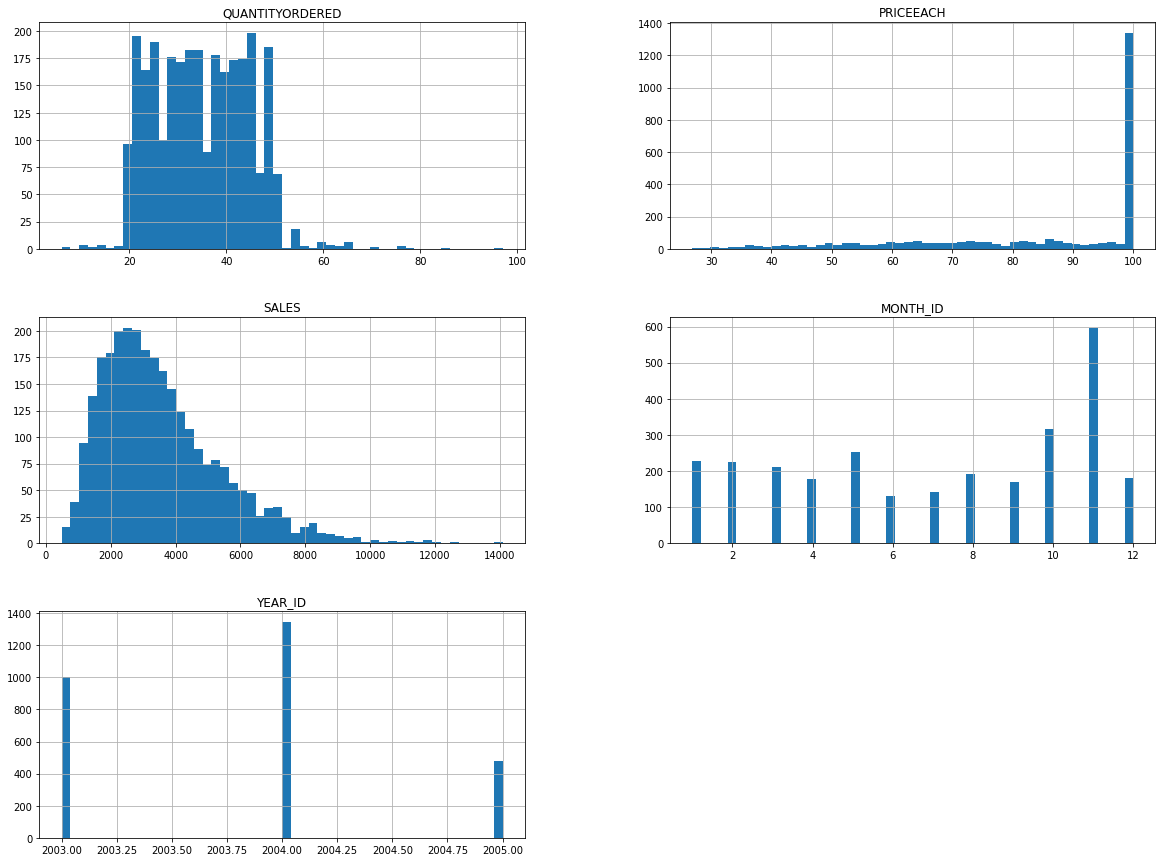

In [14]:
new_df.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
sales_df=new_df[['MONTH_ID','SALES']]
sales_df.head()

,MONTH_ID,SALES
0,2,2871.00
1,5,2765.90
2,7,3884.34
3,8,3746.70
4,10,5205.27


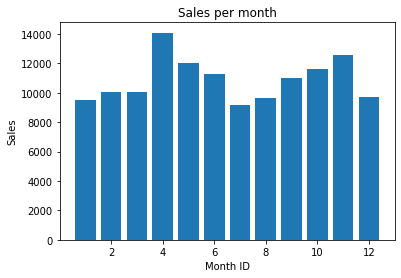

In [16]:
#sales per month
plt.bar(new_df['MONTH_ID'], new_df['SALES'] )
plt.title('Sales per month')
plt.xlabel('Month ID')
plt.ylabel('Sales')
plt.show()

In [17]:
#sales per location
len(new_df['CITY'].unique().tolist())



73

In [18]:
#sales per item

len(new_df['PRODUCTCODE'].unique().tolist())


109

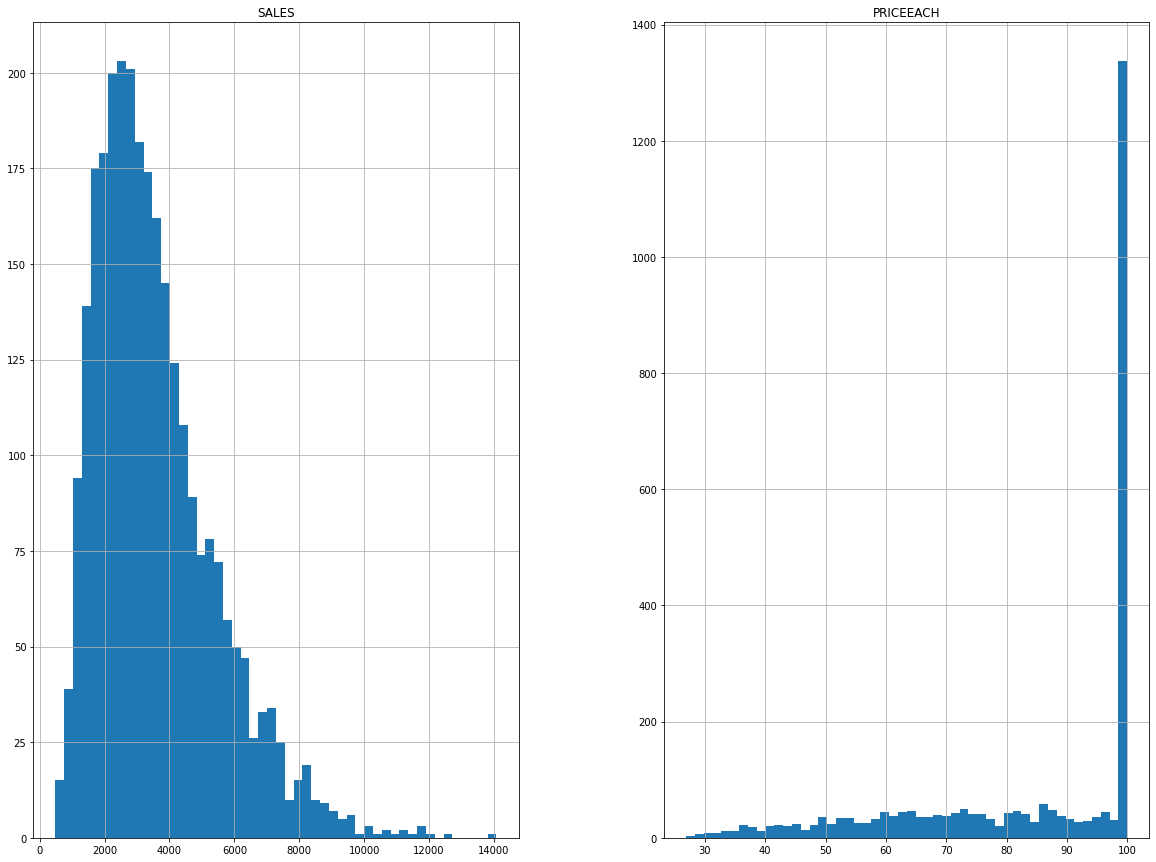

In [19]:
# frequency of sales per price each

new_df.hist(column=['SALES','PRICEEACH'] ,bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

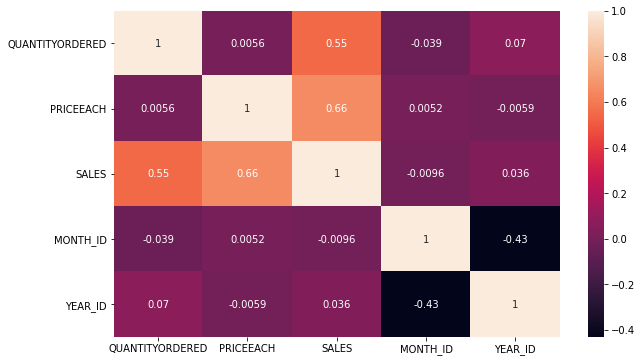

In [20]:
cor = new_df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

In [21]:
corr_matrix = new_df.corr()

corr_matrix["SALES"].sort_values(ascending=False)


SALES              1.000000
PRICEEACH          0.657841
QUANTITYORDERED    0.551426
YEAR_ID            0.035647
MONTH_ID          -0.009605
Name: SALES, dtype: float64

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   PRODUCTCODE      2823 non-null   object 
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   CUSTOMERNAME     2823 non-null   object 
 10  PHONE            2823 non-null   object 
 11  ADDRESSLINE1     2823 non-null   object 
 12  CITY             2823 non-null   object 
 13  POSTALCODE       2747 non-null   object 
 14  COUNTRY          2823 non-null   object 
 15  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 353.0+ KB


In [ ]:
#FEATURE SELECTION
#Change sales to a categorical feature 
#Encode sales
#Create a df from categorical features
#Encode them
#Combine them with the sales df
#Run feature selection on the new df

In [212]:
#separate the categorical columns for further preprocessing
cat_df_= new_df[['PRODUCTCODE','CUSTOMERNAME','PHONE','ADDRESSLINE1','CITY','POSTALCODE','COUNTRY','DEALSIZE']]

cat_df_.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PRODUCTCODE   2823 non-null   object
 1   CUSTOMERNAME  2823 non-null   object
 2   PHONE         2823 non-null   object
 3   ADDRESSLINE1  2823 non-null   object
 4   CITY          2823 non-null   object
 5   POSTALCODE    2747 non-null   object
 6   COUNTRY       2823 non-null   object
 7   DEALSIZE      2823 non-null   object
dtypes: object(8)
memory usage: 176.6+ KB


In [164]:
#change sales to a categorical feature
target_df = new_df['SALES']
target_df

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2823, dtype: float64

In [213]:
new_df['SALES'].describe()

count     2823.000000
mean      3553.889072
std       1841.865106
min        482.130000
25%       2203.430000
50%       3184.800000
75%       4508.000000
max      14082.800000
Name: SALES, dtype: float64

In [360]:
#change sales to a categorical value
target_df = pd.cut(x=new_df['SALES'], bins=[0, 482, 2203, 3184, 4508, 14082], labels = ['0-482','483-2203','2204-3184','3185-4508','4509-14082'])


In [361]:
target_df

0        2204-3184
1        2204-3184
2        3185-4508
3        3185-4508
4       4509-14082
           ...    
2818     2204-3184
2819     3185-4508
2820    4509-14082
2821      483-2203
2822     2204-3184
Name: SALES, Length: 2823, dtype: category
Categories (5, object): ['0-482' < '483-2203' < '2204-3184' < '3185-4508' < '4509-14082']

In [362]:
target_df=target_df.astype('category')

In [363]:
#Encode sales
label_encoder = LabelEncoder()
target_df_encoded = label_encoder.fit_transform(target_df)
target_df_encoded

array([0, 0, 1, ..., 2, 3, 0])

In [ ]:
#CREATE CAT_DF TO ENCODED VALUES

In [175]:
cat_df_.astype(str)

,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Small
1,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Small
2,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Medium
3,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Medium
4,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,0,USA,Medium
...,...,...,...,...,...,...,...,...
2818,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Small
2819,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Medium
2820,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Medium
2821,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Small


In [174]:
cat_df_=cat_df_.fillna(0000)

In [225]:
#ENCODE CAT_DF_ USING LABELENCODER
#Using label encoder
from sklearn.preprocessing import LabelEncoder

#labelencoder = LabelEncoder()
label_encoded_df = pd.DataFrame(columns=cat_df_.columns, data=LabelEncoder().fit_transform(cat_df_.values.flatten()).reshape(cat_df_.shape))

In [226]:
label_encoded_df.head()

,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,385,315,71,193,352,41,534,507
1,385,378,86,137,377,128,284,507
2,385,324,16,89,369,172,284,332
3,385,530,154,182,370,195,534,332
4,385,261,156,177,497,551,534,332


In [227]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
cat_df_ordinalencoded = ordinal_encoder.fit_transform(label_encoded_df)

cat_df_ordinalencoded

array([[  0.,  45.,  48., ...,   0.,  18.,   2.],
       [  0.,  66.,  54., ...,  27.,   6.,   2.],
       [  0.,  46.,  16., ...,  41.,   6.,   1.],
       ...,
       [108.,  33.,  13., ...,  14.,  14.,   1.],
       [108.,   1.,  69., ...,  16.,   6.,   2.],
       [108.,  37.,  75., ...,  26.,  18.,   1.]])

In [ ]:
#Running the feature selection algorithms

In [228]:
#chi selection algorithm
#Run on both ordinal encoded and label encoded data
from sklearn.feature_selection import SelectKBest, chi2, f_regression
chi_selection=SelectKBest(score_func=chi2,k='all')
chi_selection.fit_transform(cat_df_ordinalencoded,target_df_encoded)


array([[  0.,  45.,  48., ...,   0.,  18.,   2.],
       [  0.,  66.,  54., ...,  27.,   6.,   2.],
       [  0.,  46.,  16., ...,  41.,   6.,   1.],
       ...,
       [108.,  33.,  13., ...,  14.,  14.,   1.],
       [108.,   1.,  69., ...,  16.,   6.,   2.],
       [108.,  37.,  75., ...,  26.,  18.,   1.]])

In [229]:
chi_selection.scores_

array([5661.5633013 ,   48.59453969,    8.19070597,   22.34628928,
         28.13641792,   41.49159014,   10.41832052,  546.63923415])

In [260]:
for i in range(len(chi_selection.scores_)):
	print('Feature %d: %f' % (i, chi_selection.scores_[i]))

Feature 0: 5661.563301
Feature 1: 48.594540
Feature 2: 8.190706
Feature 3: 22.346289
Feature 4: 28.136418
Feature 5: 41.491590
Feature 6: 10.418321
Feature 7: 546.639234


In [267]:
#Mutual Information Algorithm
#Run both label encoded and ordinal encoded data
from sklearn.feature_selection import SelectKBest, chi2, f_regression,mutual_info_classif
m_i_selection=SelectKBest(score_func=mutual_info_classif,k='all')
m_i_selection.fit_transform(cat_df_ordinalencoded,target_df_encoded)

array([[  0.,  45.,  48., ...,   0.,  18.,   2.],
       [  0.,  66.,  54., ...,  27.,   6.,   2.],
       [  0.,  46.,  16., ...,  41.,   6.,   1.],
       ...,
       [108.,  33.,  13., ...,  14.,  14.,   1.],
       [108.,   1.,  69., ...,  16.,   6.,   2.],
       [108.,  37.,  75., ...,  26.,  18.,   1.]])

In [268]:
m_i_selection.scores_

array([2.90880669e-01, 7.37674745e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.21490048e-01])

In [269]:
for i in range(len(m_i_selection.scores_)):
	print('Feature %d: %f' % (i, m_i_selection.scores_[i]))

Feature 0: 0.290881
Feature 1: 0.000074
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.621490


In [ ]:
#Nb: The scores of the MI score kept fluctuating. But what remained constant was the scores of Feature 0 and Feature 7. The others were highly unstable scores. Thus, for the feature selection, we settled on Features 0 and 7 from the MI score

In [ ]:
#END OF FEATURE SELECTION

In [ ]:
#PREPARE DATA FOR THE CLUSTERING ALGORITHM

In [271]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   PRODUCTCODE      2823 non-null   object 
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   CUSTOMERNAME     2823 non-null   object 
 9   PHONE            2823 non-null   object 
 10  ADDRESSLINE1     2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  POSTALCODE       2747 non-null   object 
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 330.9+ KB


In [43]:
#CREATE THE FINAL DF

In [272]:
final_df = new_df.drop(columns=['ORDERDATE','STATUS','MONTH_ID','YEAR_ID','CUSTOMERNAME','PHONE','POSTALCODE','ADDRESSLINE1','CITY','COUNTRY'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   PRODUCTCODE      2823 non-null   object 
 3   SALES            2823 non-null   float64
 4   DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 110.4+ KB


In [276]:
final_df.head()

,QUANTITYORDERED,PRICEEACH,PRODUCTCODE,SALES,DEALSIZE
0,30,95.70,S10_1678,2871.00,Small
1,34,81.35,S10_1678,2765.90,Small
2,41,94.74,S10_1678,3884.34,Medium
3,45,83.26,S10_1678,3746.70,Medium
4,49,100.00,S10_1678,5205.27,Medium


In [ ]:
#Change the integer values into categorical statements
#Categorize them according to 10 percentiles



In [ ]:
#SALES

In [286]:
final_df = final_df.drop(columns=['SALES'])
final_df

,QUANTITYORDERED,PRICEEACH,PRODUCTCODE,DEALSIZE
0,30,95.70,S10_1678,Small
1,34,81.35,S10_1678,Small
2,41,94.74,S10_1678,Medium
3,45,83.26,S10_1678,Medium
4,49,100.00,S10_1678,Medium
...,...,...,...,...
2818,20,100.00,S72_3212,Small
2819,29,100.00,S72_3212,Medium
2820,43,100.00,S72_3212,Medium
2821,34,62.24,S72_3212,Small


In [364]:
#SALES

final_df['SALES'] = target_df
final_df


,PRODUCTCODE,DEALSIZE,SALES,QUANTITYORDERED,PRICEEACH
0,S10_1678,Small,2204-3184,21-30,21-30
1,S10_1678,Small,2204-3184,31-40,31-40
2,S10_1678,Medium,3185-4508,41-50,41-50
3,S10_1678,Medium,3185-4508,41-50,41-50
4,S10_1678,Medium,4509-14082,41-50,41-50
...,...,...,...,...,...
2818,S72_3212,Small,2204-3184,11-20,11-20
2819,S72_3212,Medium,3185-4508,21-30,21-30
2820,S72_3212,Medium,4509-14082,41-50,41-50
2821,S72_3212,Small,483-2203,31-40,31-40


In [289]:
#QUANTITYORDERED
final_df['QUANTITYORDERED'].describe()

count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

In [290]:
qtty_df = final_df['QUANTITYORDERED']
qtty_df = pd.cut(x=final_df['QUANTITYORDERED'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = ['0-10','11-20','21-30','31-40','41-50','51-60', '61-70','71-80','81-90','91-100'])
qtty_df

0       21-30
1       31-40
2       41-50
3       41-50
4       41-50
        ...  
2818    11-20
2819    21-30
2820    41-50
2821    31-40
2822    41-50
Name: QUANTITYORDERED, Length: 2823, dtype: category
Categories (10, object): ['0-10' < '11-20' < '21-30' < '31-40' ... '61-70' < '71-80' < '81-90' < '91-100']

In [291]:
#Drop the original column
final_df = final_df.drop(columns=['QUANTITYORDERED'])
final_df

,PRICEEACH,PRODUCTCODE,DEALSIZE,SALES
0,95.70,S10_1678,Small,25%-50%
1,81.35,S10_1678,Small,25%-50%
2,94.74,S10_1678,Medium,50%-75%
3,83.26,S10_1678,Medium,50%-75%
4,100.00,S10_1678,Medium,75%-100%
...,...,...,...,...
2818,100.00,S72_3212,Small,25%-50%
2819,100.00,S72_3212,Medium,50%-75%
2820,100.00,S72_3212,Medium,75%-100%
2821,62.24,S72_3212,Small,min-25%


In [292]:
#Add the new categorical column
final_df['QUANTITYORDERED'] = qtty_df
final_df

In [295]:
final_df['PRICEEACH'].describe()

count    2823.000000
mean       83.658544
std        20.174277
min        26.880000
25%        68.860000
50%        95.700000
75%       100.000000
max       100.000000
Name: PRICEEACH, dtype: float64

In [296]:
#PRICEEACH
price_df = pd.cut(x=final_df['PRICEEACH'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = ['0-10','11-20','21-30','31-40','41-50','51-60', '61-70','71-80','81-90','91-100'])
price_df

0       91-100
1        81-90
2       91-100
3        81-90
4       91-100
         ...  
2818    91-100
2819    91-100
2820    91-100
2821     61-70
2822     61-70
Name: PRICEEACH, Length: 2823, dtype: category
Categories (10, object): ['0-10' < '11-20' < '21-30' < '31-40' ... '61-70' < '71-80' < '81-90' < '91-100']

In [298]:
final_df = final_df.drop(columns=['PRICEEACH'])
final_df['PRICEEACH'] = qtty_df
final_df

,PRODUCTCODE,DEALSIZE,SALES,QUANTITYORDERED,PRICEEACH
0,S10_1678,Small,25%-50%,21-30,21-30
1,S10_1678,Small,25%-50%,31-40,31-40
2,S10_1678,Medium,50%-75%,41-50,41-50
3,S10_1678,Medium,50%-75%,41-50,41-50
4,S10_1678,Medium,75%-100%,41-50,41-50
...,...,...,...,...,...
2818,S72_3212,Small,25%-50%,11-20,11-20
2819,S72_3212,Medium,50%-75%,21-30,21-30
2820,S72_3212,Medium,75%-100%,41-50,41-50
2821,S72_3212,Small,min-25%,31-40,31-40


In [ ]:
#END OF CONVERTING TO CATEGORICAL FEATURES

In [365]:

final_df

,PRODUCTCODE,DEALSIZE,SALES,QUANTITYORDERED,PRICEEACH
0,S10_1678,Small,2204-3184,21-30,21-30
1,S10_1678,Small,2204-3184,31-40,31-40
2,S10_1678,Medium,3185-4508,41-50,41-50
3,S10_1678,Medium,3185-4508,41-50,41-50
4,S10_1678,Medium,4509-14082,41-50,41-50
...,...,...,...,...,...
2818,S72_3212,Small,2204-3184,11-20,11-20
2819,S72_3212,Medium,3185-4508,21-30,21-30
2820,S72_3212,Medium,4509-14082,41-50,41-50
2821,S72_3212,Small,483-2203,31-40,31-40


In [366]:
#carry out encoding
final_df_enc=pd.get_dummies(final_df, columns=['PRODUCTCODE','DEALSIZE','SALES','QUANTITYORDERED','PRICEEACH'], drop_first=True)
final_df_enc.head()

,PRODUCTCODE_S10_1949,PRODUCTCODE_S10_2016,PRODUCTCODE_S10_4698,PRODUCTCODE_S10_4757,PRODUCTCODE_S10_4962,PRODUCTCODE_S12_1099,PRODUCTCODE_S12_1108,PRODUCTCODE_S12_1666,PRODUCTCODE_S12_2823,PRODUCTCODE_S12_3148,...,QUANTITYORDERED_91-100,PRICEEACH_11-20,PRICEEACH_21-30,PRICEEACH_31-40,PRICEEACH_41-50,PRICEEACH_51-60,PRICEEACH_61-70,PRICEEACH_71-80,PRICEEACH_81-90,PRICEEACH_91-100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [367]:
final_df_enc.shape

(2823, 132)

In [368]:
#run the final dataset through a standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_df_enc)
scaled_df

array([[-0.10008941, -0.09641408, -0.09641408, ..., -0.03766886,
        -0.01882442, -0.01882442],
       [-0.10008941, -0.09641408, -0.09641408, ..., -0.03766886,
        -0.01882442, -0.01882442],
       [-0.10008941, -0.09641408, -0.09641408, ..., -0.03766886,
        -0.01882442, -0.01882442],
       ...,
       [-0.10008941, -0.09641408, -0.09641408, ..., -0.03766886,
        -0.01882442, -0.01882442],
       [-0.10008941, -0.09641408, -0.09641408, ..., -0.03766886,
        -0.01882442, -0.01882442],
       [-0.10008941, -0.09641408, -0.09641408, ..., -0.03766886,
        -0.01882442, -0.01882442]])

In [369]:
final_df_enc.shape

(2823, 132)

In [370]:
data_cols = final_df_enc.columns
data_cols = np.array(data_cols)

data_cols

array(['PRODUCTCODE_S10_1949', 'PRODUCTCODE_S10_2016',
       'PRODUCTCODE_S10_4698', 'PRODUCTCODE_S10_4757',
       'PRODUCTCODE_S10_4962', 'PRODUCTCODE_S12_1099',
       'PRODUCTCODE_S12_1108', 'PRODUCTCODE_S12_1666',
       'PRODUCTCODE_S12_2823', 'PRODUCTCODE_S12_3148',
       'PRODUCTCODE_S12_3380', 'PRODUCTCODE_S12_3891',
       'PRODUCTCODE_S12_3990', 'PRODUCTCODE_S12_4473',
       'PRODUCTCODE_S12_4675', 'PRODUCTCODE_S18_1097',
       'PRODUCTCODE_S18_1129', 'PRODUCTCODE_S18_1342',
       'PRODUCTCODE_S18_1367', 'PRODUCTCODE_S18_1589',
       'PRODUCTCODE_S18_1662', 'PRODUCTCODE_S18_1749',
       'PRODUCTCODE_S18_1889', 'PRODUCTCODE_S18_1984',
       'PRODUCTCODE_S18_2238', 'PRODUCTCODE_S18_2248',
       'PRODUCTCODE_S18_2319', 'PRODUCTCODE_S18_2325',
       'PRODUCTCODE_S18_2432', 'PRODUCTCODE_S18_2581',
       'PRODUCTCODE_S18_2625', 'PRODUCTCODE_S18_2795',
       'PRODUCTCODE_S18_2870', 'PRODUCTCODE_S18_2949',
       'PRODUCTCODE_S18_2957', 'PRODUCTCODE_S18_3029',
       'PR

In [371]:
data_cols_reshaped =data_cols.reshape(-1, 1)
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_cols_num = ordinal_encoder.fit_transform(data_cols_reshaped)


In [372]:
label_encoder = LabelEncoder()
data_cols_encoded = label_encoder.fit_transform(data_cols)
data_cols_encoded

array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118,   0,   1, 131, 128, 129, 130, 119, 120, 121,
       122, 123, 124, 125, 126, 127,   2,   3,   4,   5,   6,   7,   8,
         9,  10])

In [373]:
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score
from sklearn.metrics import silhouette_score
from sklearn import metrics

for i in range (2,11):
    spectral_coclustering = SpectralCoclustering(n_clusters=i, random_state=0)
    spectral_coclustering.fit(scaled_df)
    #score = silhouette_score(data_cols_num, spectral_coclustering.column_labels_)
    c_score = metrics.calinski_harabasz_score(data_cols_num, spectral_coclustering.column_labels_)
    print("calinski_harabasz score for", i, "clusters is", c_score )

    score = 0 
    c_score = 0



calinski_harabasz score for 2 clusters is 4.280741575127253
calinski_harabasz score for 3 clusters is 4.146194689324568
calinski_harabasz score for 4 clusters is 0.296221546290841
calinski_harabasz score for 5 clusters is 2.2206175870865796
calinski_harabasz score for 6 clusters is 1.8856184505082751
calinski_harabasz score for 7 clusters is 1.0283686048088863
calinski_harabasz score for 8 clusters is 0.877099579753654
calinski_harabasz score for 9 clusters is 0.5447356153598361
calinski_harabasz score for 10 clusters is 0.8668453117627776


In [374]:
spectral_coclustering = SpectralCoclustering(n_clusters=3, random_state=42)
spectral_coclustering.fit(scaled_df)

SpectralCoclustering(random_state=42)

In [375]:
spectral_coclustering.column_labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1])

In [376]:
from sklearn import metrics


In [377]:
print("row labels are :", spectral_coclustering.row_labels_ )

print("column labels are:", spectral_coclustering.column_labels_)

row labels are : [0 2 1 ... 1 2 1]
column labels are: [1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 2 1 1 0 1 0 0 0 1 0 1 0 2 1 0 1 0 1 0 0 1 2 1 1 0 0 1
 0 1 1 0 1 1 1 1 1 1 0 2 0 0 0 1 0 1 0 1 0 0 1 0 2 1 1 1 1 2 2 1 0 0 1 0 0
 0 2 1 0 0 2 1 1 1 1 1 1 0 0 2 1 1 1 1 1 1]


In [378]:
column_labels = spectral_coclustering.column_labels_
column_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1])

In [384]:
column_df =pd.DataFrame(data_cols,column_labels)
column_df

,0
1,PRODUCTCODE_S10_1949
1,PRODUCTCODE_S10_2016
1,PRODUCTCODE_S10_4698
1,PRODUCTCODE_S10_4757
1,PRODUCTCODE_S10_4962
...,...
1,PRICEEACH_51-60
1,PRICEEACH_61-70
1,PRICEEACH_71-80
1,PRICEEACH_81-90


In [385]:
cluster_1_columns = column_df.filter(like = '0', axis=0)
cluster_1_columns

,0
0,PRODUCTCODE_S18_1367
0,PRODUCTCODE_S18_2248
0,PRODUCTCODE_S18_2432
0,PRODUCTCODE_S18_2581
0,PRODUCTCODE_S18_2625
0,PRODUCTCODE_S18_2957
0,PRODUCTCODE_S18_3136
0,PRODUCTCODE_S18_3782
0,PRODUCTCODE_S18_4668
0,PRODUCTCODE_S18_4933


In [386]:
c1_columns = np.array(cluster_1_columns).flatten()
c1_columns = c1_columns.tolist()
c1_columns

['PRODUCTCODE_S18_1367',
 'PRODUCTCODE_S18_2248',
 'PRODUCTCODE_S18_2432',
 'PRODUCTCODE_S18_2581',
 'PRODUCTCODE_S18_2625',
 'PRODUCTCODE_S18_2957',
 'PRODUCTCODE_S18_3136',
 'PRODUCTCODE_S18_3782',
 'PRODUCTCODE_S18_4668',
 'PRODUCTCODE_S18_4933',
 'PRODUCTCODE_S24_1046',
 'PRODUCTCODE_S24_1444',
 'PRODUCTCODE_S24_1628',
 'PRODUCTCODE_S24_1937',
 'PRODUCTCODE_S24_2022',
 'PRODUCTCODE_S24_2360',
 'PRODUCTCODE_S24_2840',
 'PRODUCTCODE_S24_2841',
 'PRODUCTCODE_S24_3371',
 'PRODUCTCODE_S24_3420',
 'PRODUCTCODE_S24_3816',
 'PRODUCTCODE_S24_3969',
 'PRODUCTCODE_S32_2206',
 'PRODUCTCODE_S32_3207',
 'PRODUCTCODE_S32_3522',
 'PRODUCTCODE_S32_4289',
 'PRODUCTCODE_S50_1341',
 'PRODUCTCODE_S50_1514',
 'PRODUCTCODE_S700_1138',
 'PRODUCTCODE_S700_1691',
 'PRODUCTCODE_S700_2047',
 'PRODUCTCODE_S72_1253',
 'PRODUCTCODE_S72_3212',
 'DEALSIZE_Small',
 'SALES_483-2203',
 'SALES_2204-3184',
 'QUANTITYORDERED_11-20',
 'QUANTITYORDERED_21-30',
 'PRICEEACH_11-20',
 'PRICEEACH_21-30']

In [387]:
cluster_1 =final_df_enc[c1_columns]
cluster_1

,PRODUCTCODE_S18_1367,PRODUCTCODE_S18_2248,PRODUCTCODE_S18_2432,PRODUCTCODE_S18_2581,PRODUCTCODE_S18_2625,PRODUCTCODE_S18_2957,PRODUCTCODE_S18_3136,PRODUCTCODE_S18_3782,PRODUCTCODE_S18_4668,PRODUCTCODE_S18_4933,...,PRODUCTCODE_S700_2047,PRODUCTCODE_S72_1253,PRODUCTCODE_S72_3212,DEALSIZE_Small,SALES_483-2203,SALES_2204-3184,QUANTITYORDERED_11-20,QUANTITYORDERED_21-30,PRICEEACH_11-20,PRICEEACH_21-30
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,0
2819,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2820,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2821,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [389]:
cluster_2_columns = column_df.filter(like = '1', axis=0)
cluster_2_columns

,0
1,PRODUCTCODE_S10_1949
1,PRODUCTCODE_S10_2016
1,PRODUCTCODE_S10_4698
1,PRODUCTCODE_S10_4757
1,PRODUCTCODE_S10_4962
...,...
1,PRICEEACH_51-60
1,PRICEEACH_61-70
1,PRICEEACH_71-80
1,PRICEEACH_81-90


In [390]:
c2_columns = np.array(cluster_2_columns).flatten()
c2_columns = c2_columns.tolist()
c2_columns

['PRODUCTCODE_S10_1949',
 'PRODUCTCODE_S10_2016',
 'PRODUCTCODE_S10_4698',
 'PRODUCTCODE_S10_4757',
 'PRODUCTCODE_S10_4962',
 'PRODUCTCODE_S12_1099',
 'PRODUCTCODE_S12_1108',
 'PRODUCTCODE_S12_1666',
 'PRODUCTCODE_S12_2823',
 'PRODUCTCODE_S12_3148',
 'PRODUCTCODE_S12_3380',
 'PRODUCTCODE_S12_3891',
 'PRODUCTCODE_S12_4473',
 'PRODUCTCODE_S12_4675',
 'PRODUCTCODE_S18_1097',
 'PRODUCTCODE_S18_1129',
 'PRODUCTCODE_S18_1342',
 'PRODUCTCODE_S18_1589',
 'PRODUCTCODE_S18_1662',
 'PRODUCTCODE_S18_1749',
 'PRODUCTCODE_S18_1889',
 'PRODUCTCODE_S18_1984',
 'PRODUCTCODE_S18_2238',
 'PRODUCTCODE_S18_2319',
 'PRODUCTCODE_S18_2325',
 'PRODUCTCODE_S18_2795',
 'PRODUCTCODE_S18_2870',
 'PRODUCTCODE_S18_2949',
 'PRODUCTCODE_S18_3029',
 'PRODUCTCODE_S18_3140',
 'PRODUCTCODE_S18_3232',
 'PRODUCTCODE_S18_3259',
 'PRODUCTCODE_S18_3278',
 'PRODUCTCODE_S18_3320',
 'PRODUCTCODE_S18_3482',
 'PRODUCTCODE_S18_3685',
 'PRODUCTCODE_S18_3856',
 'PRODUCTCODE_S18_4027',
 'PRODUCTCODE_S18_4522',
 'PRODUCTCODE_S18_4600',


In [391]:
c2_columns = np.array(cluster_2_columns).flatten()
c2_columns = c2_columns.tolist()
c2_columns

['PRODUCTCODE_S10_1949',
 'PRODUCTCODE_S10_2016',
 'PRODUCTCODE_S10_4698',
 'PRODUCTCODE_S10_4757',
 'PRODUCTCODE_S10_4962',
 'PRODUCTCODE_S12_1099',
 'PRODUCTCODE_S12_1108',
 'PRODUCTCODE_S12_1666',
 'PRODUCTCODE_S12_2823',
 'PRODUCTCODE_S12_3148',
 'PRODUCTCODE_S12_3380',
 'PRODUCTCODE_S12_3891',
 'PRODUCTCODE_S12_4473',
 'PRODUCTCODE_S12_4675',
 'PRODUCTCODE_S18_1097',
 'PRODUCTCODE_S18_1129',
 'PRODUCTCODE_S18_1342',
 'PRODUCTCODE_S18_1589',
 'PRODUCTCODE_S18_1662',
 'PRODUCTCODE_S18_1749',
 'PRODUCTCODE_S18_1889',
 'PRODUCTCODE_S18_1984',
 'PRODUCTCODE_S18_2238',
 'PRODUCTCODE_S18_2319',
 'PRODUCTCODE_S18_2325',
 'PRODUCTCODE_S18_2795',
 'PRODUCTCODE_S18_2870',
 'PRODUCTCODE_S18_2949',
 'PRODUCTCODE_S18_3029',
 'PRODUCTCODE_S18_3140',
 'PRODUCTCODE_S18_3232',
 'PRODUCTCODE_S18_3259',
 'PRODUCTCODE_S18_3278',
 'PRODUCTCODE_S18_3320',
 'PRODUCTCODE_S18_3482',
 'PRODUCTCODE_S18_3685',
 'PRODUCTCODE_S18_3856',
 'PRODUCTCODE_S18_4027',
 'PRODUCTCODE_S18_4522',
 'PRODUCTCODE_S18_4600',


In [392]:
cluster_2 =final_df_enc[c2_columns]
cluster_2

,PRODUCTCODE_S10_1949,PRODUCTCODE_S10_2016,PRODUCTCODE_S10_4698,PRODUCTCODE_S10_4757,PRODUCTCODE_S10_4962,PRODUCTCODE_S12_1099,PRODUCTCODE_S12_1108,PRODUCTCODE_S12_1666,PRODUCTCODE_S12_2823,PRODUCTCODE_S12_3148,...,QUANTITYORDERED_61-70,QUANTITYORDERED_71-80,QUANTITYORDERED_81-90,QUANTITYORDERED_91-100,PRICEEACH_41-50,PRICEEACH_51-60,PRICEEACH_61-70,PRICEEACH_71-80,PRICEEACH_81-90,PRICEEACH_91-100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [393]:
cluster_3_columns = column_df.filter(like = '2', axis=0)
cluster_3_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11 non-null     object
dtypes: object(1)
memory usage: 176.0+ bytes


In [394]:
c3_columns = np.array(cluster_3_columns).flatten()
c3_columns = c3_columns.tolist()
c3_columns

['PRODUCTCODE_S12_3990',
 'PRODUCTCODE_S18_4409',
 'PRODUCTCODE_S24_2000',
 'PRODUCTCODE_S24_2972',
 'PRODUCTCODE_S32_2509',
 'PRODUCTCODE_S700_2466',
 'PRODUCTCODE_S700_3505',
 'PRODUCTCODE_S700_3962',
 'SALES_3185-4508',
 'QUANTITYORDERED_31-40',
 'PRICEEACH_31-40']

In [359]:
cluster_3 =final_df_enc[c3_columns]
cluster_3

,PRODUCTCODE_S12_3990,PRODUCTCODE_S18_4409,PRODUCTCODE_S24_2000,PRODUCTCODE_S24_2972,PRODUCTCODE_S32_2509,PRODUCTCODE_S700_2466,PRODUCTCODE_S700_3505,PRODUCTCODE_S700_3962,SALES_50%-75%,QUANTITYORDERED_31-40,PRICEEACH_31-40
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2818,0,0,0,0,0,0,0,0,0,0,0
2819,0,0,0,0,0,0,0,0,1,0,0
2820,0,0,0,0,0,0,0,0,0,0,0
2821,0,0,0,0,0,0,0,0,0,1,1


In [106]:
cluster_4_columns = column_df.filter(like = '3', axis=0)
cluster_4_columns

,0


In [107]:
c4_columns = np.array(cluster_4_columns).flatten()
c4_columns = c4_columns.tolist()
c4_columns

[]

In [108]:
cluster_4 =final_df_enc[c4_columns]
cluster_4

""
0
1
2
3
4
...
2818
2819
2820
2821


In [101]:
cluster_5_columns = column_df.filter(like = '4', axis=0)
cluster_5_columns

,0


In [102]:
c5_columns = np.array(cluster_5_columns).flatten()
c5_columns = c5_columns.tolist()
c5_columns

[]

In [103]:
cluster_5 =final_df_enc[c5_columns]
cluster_5

""
0
1
2
3
4
...
2818
2819
2820
2821
